# 4장. 가장 훌륭한 예측선

## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [ ]:
import numpy as np

### 2. 데이터 준비

In [ ]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#### [x와 y의 평균값]

In [ ]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


#### [기울기 공식의 분모와 분자]

In [ ]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


### 3. 기울기와 y 절편 구하기

In [ ]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


## 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [1]:
import numpy as np

### 2. 데이터 준비

In [3]:
# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

# 공부 시간  y의 넘파x와 성적이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 평균 제곱 오차 구하기

In [5]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [6]:
# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


Epoch 0: Train Loss = 1.1374, Val Loss = 1.1005
Epoch 10: Train Loss = 0.9039, Val Loss = 0.8926
Epoch 20: Train Loss = 0.7499, Val Loss = 0.7578
Epoch 30: Train Loss = 0.6511, Val Loss = 0.6732
Epoch 40: Train Loss = 0.5921, Val Loss = 0.6076
Epoch 50: Train Loss = 0.5470, Val Loss = 0.5514
Epoch 60: Train Loss = 0.5056, Val Loss = 0.5085
Epoch 70: Train Loss = 0.4704, Val Loss = 0.4730
Epoch 80: Train Loss = 0.4436, Val Loss = 0.4503
Epoch 90: Train Loss = 0.4224, Val Loss = 0.4310


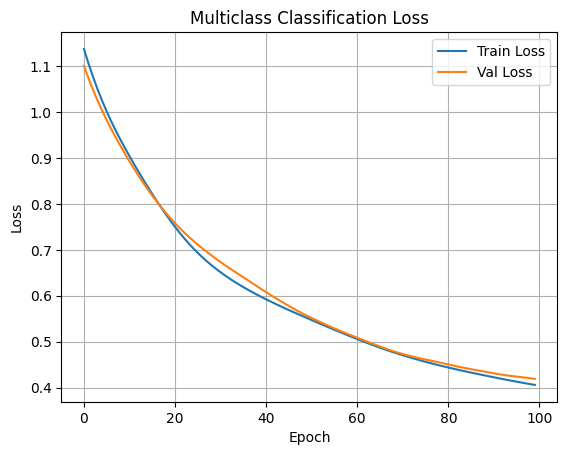

 Validation Accuracy: 88.00%


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 데이터 생성 (클래스 3개)
X, y = make_classification(n_samples=1000, n_features=4, n_classes=3,
                           n_informative=3, n_redundant=0, random_state=42)

# 2. 학습/검증 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
#print(X_train,X_val)

# 4. 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)   # CrossEntropyLoss는 long 타입 정수
y_val = torch.tensor(y_val, dtype=torch.long)

# 5. 모델 정의 (출력 노드 수 = 클래스 수)
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 3)  # 클래스 수 = 3
)

# 6. 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()  # 내부에 softmax 포함
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 7. 학습
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)            # shape: (batch_size, 3)
    loss = criterion(output, y_train)  # CrossEntropyLoss expects raw logits + long labels
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # 검증
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val)
        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

# 8. 시각화
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Multiclass Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# 9. 정확도 평가
with torch.no_grad():
    logits = model(X_val)     # Softmax를 적용하지 않았으므로 확률이 아닌 값 리턴
    preds = torch.argmax(logits, dim=1)    # 가장 높은 확률의 클래스 인덱스 리턴,dim=1 1차원
    acc = (preds == y_val).float().mean()  # 정답을 대상으로 평균 계산
    print(f" Validation Accuracy: {acc.item() * 100:.2f}%")

In [23]:
import torch.nn.functional as F
probs = F.softmax(logits, dim=1)  # dim=1 차원의 위치(200, 3) = (dim=0, dim=1)
probs[0], sum(probs[0])

(tensor([0.0657, 0.3526, 0.5817]), tensor(1.))